# Load Things

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
import csv
import math

import nltk

from sklearn.decomposition import PCA

In [2]:
reviews = pd.read_csv('Processed_Data/all_reviews.csv')
reviews.head()

Unnamed: 0                                   BOHEMIAN_gallery  \
0           0  Cozy neighborhood spot for a good coffee and y...   
1           1  I thought this cafe was okay. I got the matcha...   
2           2  Cute cafe that made a nice strong cortado. Fri...   
3           3  Good neighborhood place for breakfast sandwich...   
4           4  Big fan of this place! Love the kahlo breakfas...   

                                   BOHEMIAN_Gaslight  \
0  So I live relatively close now, and an update ...   
1  Roasted: came here because I couldn't drink th...   
2  Gaslight - the coffee shop designed for the ev...   
3  It's good coffee but it's a little bit overpri...   
4  Hands down one of my favorite coffee shops, ev...   

                             BOHEMIAN_Intelligentsia  \
0  There's a reason why Intelligentsia is at the ...   
1  Always a pleasure coming to this intelli locat...   
2  While this is a short walk from me and a cute ...   
3  Good coffee, but slightly steep prices. This i...   
4  Ah, 7 months after my Chicago trip and I'm fin...   

                                    BOHEMIAN_Ipsento  \
0  Went here on a hot day after walking the 606. ...   
1  Espresso served too hot, bean quality not impr...   
2  Jacking'em up to a four star because at the en...   
3  Nice coffee shop in the area. About a 5 minute...   
4  Really great vibes here! It's a great space wi...   

                                     BOHEMIAN_volume  \
0  It's about time I write a review for this plac...   
1  Regardless of the SJW crap all over their wind...   
2  I first heard about Volumes from a friend, the...   
3  Super cute and modern neighborhood cafe & book...   
4  Volumes has easily become one of my favorite C...   

                                   BOHEMIAN_wormhole  \
0  A unique experience. Upon walking inside Wormh...   
1  If you like craft coffee mixed with 80's nosta...   
2  I love this place!! My only complaint is that ...   
3  This coffee shop is the MF bomb and I love it!...   
4  Wormhole is definitely a trendy/hipster modern...   

                                   CORPORATE_Bageler  \
0  Where do I begin? I need 10 stars for this pla...   
1  4.5 stars. GREAT bagels and cream cheese here....   
2  If you are staying in Lincoln Park and you nee...   
3  Ugh love this place! It feels so random on the...   
4  Delicious. Warm, freshly made bagels and drink...   

                                  CORPORATE_Bourgeoi  \
0  Absolutely LOVE this place. Today was my first...   
1  I went there today for the first time and orde...   
2  Bourgeois just means too rich for their britch...   
3  Quality of the Pig has decreased. Atmosphere r...   
4  So I came to this establishment a lot, like ev...   

                                   CORPORATE_Cupitol  \
0  This is probably my favorite coffee and eatery...   
1  I had breakfast here this past week. I really ...   
2  This cafe is very cute and crowded. It's super...   
3  I came in for breakfast with my friends on a S...   
4  I came in around 8am on a Saturday to work. I'...   

                               CORPORATE_Dollop_Loop  \
0  This location is very busy and there is a wait...   
1  This place has a lot of mosquitos inside, stra...   
2  Ok super annoyed with this place. Their coffee...   
3  I had a very nice cortado here this morning, a...   
4  I work right in the building but I'm always he...   

                             CORPORATE_dollop_street  \
0  Happy to have found a place that locals freque...   
1  What a delightful little coffee shop. The name...   
2  The honey cinnamon latte is my favorite drink ...   
3  I happened to pass Dollop on my way to Yolk th...   
4  This Chicago only quasi-small chain has some a...   

                       CORPORATE_Intelligentsia_Loop  \
0  I'm a big fan of Intelligentsia and this is on...   
1  Anytime I come to Chicago, usually a stop to a...   
2  Excellent coffee, good atmosphere. Quality foo...   


In [11]:
reviews.columns

Index(['Unnamed: 0', 'BOHEMIAN_gallery', 'BOHEMIAN_Gaslight',
       'BOHEMIAN_Intelligentsia', 'BOHEMIAN_Ipsento', 'BOHEMIAN_volume',
       'BOHEMIAN_wormhole', 'CORPORATE_Bageler', 'CORPORATE_Bourgeoi',
       'CORPORATE_Cupitol', 'CORPORATE_Dollop_Loop', 'CORPORATE_dollop_street',
       'CORPORATE_Intelligentsia_Loop', 'NEIGHBORLY_Currency',
       'NEIGHBORLY_Dollop_Hyde', 'NEIGHBORLY_Kusanya', 'NEIGHBORLY_medici',
       'NEIGHBORLY_Plein', 'NEIGHBORLY_Robust'],
      dtype='object')

# Preprocess Words

In [3]:
def clean_df_to_list (df):
    """
    Cleans the data.
    
    :param df: Dataframe where each column is a business
    :type  df: pandas.core.frame.DataFrame
    :returns: 
    :rtype:   list
    """
    
    clean_df = df.drop(['Unnamed: 0'], axis=1).fillna('')
    to_np = clean_df.values.flatten()
    review_list = to_np.tolist()
    words_in_one_string = " ".join(review_list).lower()  
    return words_in_one_string

review_string = clean_df_to_list (reviews)
review_string[:600]

"cozy neighborhood spot for a good coffee and yummy sandwiches. we stopped in for a few hours to work and the wifi, the sound level and light was perfect for getting things done. if you're nice to the barista, they may make you a fun latte with funky art on it, and their latte flavors range from standard to different. the lavender one was lovely and the spicy one had just the right touch of heat. we got one of the sandwiches after a while and it came with veggie chips on a plate that looked like a painter's palette, which was fun. and the sandwich was fresh and tasty. so i live relatively close"

In [4]:
def clean_string (string):
    lstring = string.lower()
    remove_num = re.sub(r"[0-9]+", " NUM ", lstring)
    return remove_num

reviews_cleaned = clean_string (review_string)
reviews_cleaned[:600]

"cozy neighborhood spot for a good coffee and yummy sandwiches. we stopped in for a few hours to work and the wifi, the sound level and light was perfect for getting things done. if you're nice to the barista, they may make you a fun latte with funky art on it, and their latte flavors range from standard to different. the lavender one was lovely and the spicy one had just the right touch of heat. we got one of the sandwiches after a while and it came with veggie chips on a plate that looked like a painter's palette, which was fun. and the sandwich was fresh and tasty. so i live relatively close"

In [5]:
def to_list_of_sentences (string):
    """
    Turn a string into a list of sentences, where each sentence is partitioned by words.
    
    :param string: string 
    :type  string: str
    :returns: (list of lists of words, dict of frequencies of each word)
    :rtype:   (list, dict)
    """
    
    wnl = nltk.WordNetLemmatizer()
    sent_text = nltk.sent_tokenize(string)
    # should I remove commas?
    symbols = '[()!@%^&-+\$.,?*"#\xa0]'
    sent_text = [re.sub(symbols, ' ', sentence) for sentence in sent_text]
    #print (sent_text[1])
    
    sentences = []
    for sentence in sent_text:
        tokenized_text = nltk.word_tokenize(sentence)
        lemmatized_text = [wnl.lemmatize(t) for t in tokenized_text]
        sentences.append(lemmatized_text)
        #tagged = nltk.pos_tag(tokenized_text)
        
    all_words = []
    for sentence in sentences:
        all_words = all_words + sentence
    
    from collections import Counter
    counter = Counter(all_words)
    return (sentences, counter)

sentences, counter = to_list_of_sentences (reviews_cleaned)
sentences[:1]

[['cozy',
  'neighborhood',
  'spot',
  'for',
  'a',
  'good',
  'coffee',
  'and',
  'yummy',
  'sandwich']]

# Word Embedding

In [6]:
def create_word2vec_model(sentences,
                          model_name,
                          min_count=5,
                          sg=0,
                          save=True):
    """
    Create the word2vec model and the words used.

    :param sentences: list of lists of words 
    :type  sentences: list
    :param model_name: Output file of .bin name
    :type  model_name: str
    :param min_count: Minimum number of appearances for a word to appear in word2vec
    :type  min_count: int
    :param sg: 0 for CBOW, 1 for skip gram
    :type  sg: int
    :param save: Save the file to folder Gensim_Models
    :type  save: bool

    :return: (model generated from gensim, list of words)
    :rtype:  (gensim.models.word2vec.Word2Vec, list)
    """
    from gensim.models import Word2Vec
    
    model = Word2Vec(
        sentences,
        min_count=min_count,
        sg=sg,  # 0 for CBOW, 1 for skip gram
        size=100,
        window=5
    )
    words = list(model.wv.vocab)

    if save:
        model.save('Gensim_Models/{}.bin'.format(model_name))

    print(model)
    return (model, words)

In [7]:
def create_pretrained_model():
    """
    Create the model from Stanford's GloVe pretrained embedding. 
    Apply dimension reduction onto the vectors.
    
    :returns: (list of the words , numpy array of shape (number of words, dimensions))
    :rtype:   (list, numpy.ndarray)
    """
    
    glove_dir = '/Users/jinli/Projects/glove.6B/'

    from gensim.scripts.glove2word2vec import glove2word2vec
    glove_input_file = glove_dir + 'glove.6B.50d.txt'
    word2vec_output_file = glove_dir + 'glove.6B.50d.txt.word2vec'

    glove2word2vec(glove_input_file, word2vec_output_file)

    from gensim.models import KeyedVectors
    pretrained_model = KeyedVectors.load_word2vec_format(
        word2vec_output_file, 
        binary=False
    )
    pretrained_words = pretrained_model.wv.vocab
    pretrained_result = dim_reduction (pretrained_model)
    
    return list (pretrained_words), pretrained_result

In [8]:
model, words = create_word2vec_model (sentences, "All_Businesses")

Word2Vec(vocab=2939, size=100, alpha=0.025)


In [9]:
def dim_reduction (model, dim=2):
    """
    Reduce dimension of vectors for visualization
    
    :param model: model generated from gensim
    :type  model: gensim.models.word2vec.Word2Vec
    :param dim: Number of dimensions
    :type  dim: int
    :returns: An array of (instances, dim)
    :rtype:   numpy.ndarray
    """
    X = model[model.wv.vocab] #  retrieve all of the vectors from a trained model
    
    # TSNE
    #from sklearn.manifold import TSNE
    #tsne = TSNE(n_components=2, random_state=42)
    #X_reduced_tsne = tsne.fit_transform(X)
    
    # For PCA reduction instead
    pca = PCA(n_components=dim)
    X_reduced_PCA = pca.fit_transform(X)
    return X_reduced_PCA

result = dim_reduction(model)
result.shape

/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


(2939, 2)

# Filtering Words

In [10]:
def filter_words (nparray, 
                  words,
                  counter,
                  csvs_include,
                  csvs_exclude,
                  csv_google, max_google=20000,
                  save=False,
                  out_file_name=None,
                  include_words_only=False):
    """
    Remove words from a list and remove the corresponding np coordinate.
    
    :param nparray: An array of (instances, dim)
    :type  nparray: numpy.ndarray
    :param words: list of words
    :type  words: list
    :param counter: dictionary of frequencies of words
    :type  counter: dict
    :param csvs_include: list of csv files of common words to include
    :type  csvs_include: list
    :param csvs_exclude: list of csv files of common words to exclude
    :type  csvs_exclude: list
    :param csv_google: csv file of words to exclude
    :type  csv_google: str
    :param max_google: Maximum number of words taken from google file
    :type  max_google: int
    :param save: Save the file to folder Interesting_Words_Found
    :type  save: bool
    :param out_file_name: Name of .csv output
    :type  out_file_name: str  
    :param include_words_only: Only consider the included words.
    :type  include_words_only: Bool 
    :returns: (numpy array, 
               filtered words, 
               dictionary of remaining word frequencies)
    :rtype:   (numpy.ndarray, list, dict)
    """
    
    index_of_removed_words = []
    remaining_words = []
    remaining_freq = {}
    
    include_df = pd.DataFrame()
    for file_name in csvs_include:
        file = pd.read_csv(file_name)
        include_df = include_df.append (file)
    include_words = set(include_df['WORDS'].values)   
        
    exclude_df = pd.DataFrame()
    for file_name in csvs_exclude:
        file = pd.read_csv(file_name)
        exclude_df = exclude_df.append (file)
    exclude_words = set(exclude_df['WORDS'].values)
    
    google_words = set (
        pd.read_csv (csv_google)[:max_google]['WORDS'].values)
    
    exclude_words = exclude_words.union (google_words)
    
    if include_words_only:
        for (i, word) in enumerate (words):
            if (word in include_words):
                remaining_words.append(word)
                index_of_removed_words.append(i)
                remaining_freq[word] = counter[word]
    else:
        for (i, word) in enumerate (words):
            if (not (word in google_words) and not (word in exclude_words)) or \
                (word in include_words):
                remaining_words.append(word)
                index_of_removed_words.append(i)
                remaining_freq[word] = counter[word]
    
    filtered_np_array = nparray[index_of_removed_words]
    
    if save:
        with open('Interesting_Words_Found/{}.csv'.format(out_file_name), 
                  'w', newline='') as myfile:
            wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
            wr.writerow(remaining_words)
            
    return (filtered_np_array, remaining_words, remaining_freq)

In [11]:
csvs_include = ['keywords.csv']
csvs_exclude = ['food.csv', 
                'commonwords.csv',
                'grammar_words.csv']
csvs_include = ['Word_Lists/' + file for file in csvs_include]
csvs_exclude = ['Word_Lists/' + file for file in csvs_exclude]

filtered_result, filtered_words, remaining_freq = filter_words (
    result, 
    words,
    counter,
    csvs_include,
    csvs_exclude,
    'Word_Lists/google.csv', max_google=0,
    save=True,
    out_file_name="ALL"
)

print (len (filtered_words))
filtered_words[:10]

364


['neighborhood',
 'wifi',
 'barista',
 'art',
 'veggie',
 'table',
 'intelligentsia',
 'oat',
 'baristas',
 'seating']

In [12]:
filtered_words

['neighborhood',
 'wifi',
 'barista',
 'art',
 'veggie',
 'table',
 'intelligentsia',
 'oat',
 'baristas',
 'seating',
 'iced',
 'working',
 'matcha',
 'comfy',
 'wormhole',
 'music',
 'bageler',
 'event',
 'chai',
 'gatsby',
 'eatery',
 'streeterville',
 'hangout',
 'friend',
 'ipad',
 'dollop',
 'to-go',
 'tucked',
 'ambiance',
 'disappoint',
 'niece',
 'grit',
 'vibe',
 'cheesy',
 'flavorful',
 'popping',
 'bourbon',
 'meeting',
 'studying',
 'medici',
 'coleslaw',
 'leftover',
 'hearty',
 'baguette',
 'mascarpone',
 'chilly',
 'space',
 'accommodating',
 'frosting',
 'lighting',
 'style',
 'pour-over',
 'koopa',
 'troopa',
 'brewed',
 'delorean',
 'kusanya',
 'non-profit',
 'graffiti',
 'brioche',
 'craving',
 'uchicago',
 'plein',
 'beignet',
 'cortado',
 'gaslight',
 'pricey',
 'go-to',
 'croissant',
 'koopa-troopa',
 'buttery',
 'bagelers',
 'coffeehouse',
 'chipotle',
 'crispy',
 'bourgeois',
 'quaint',
 'hipster',
 'scone',
 'wowed',
 'toasted',
 'plentiful',
 'café',
 'client

In [13]:
model.similarity('coffee', 'latte')

/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/jinli/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.35347062

# Creating Scatter Plots From Embedding

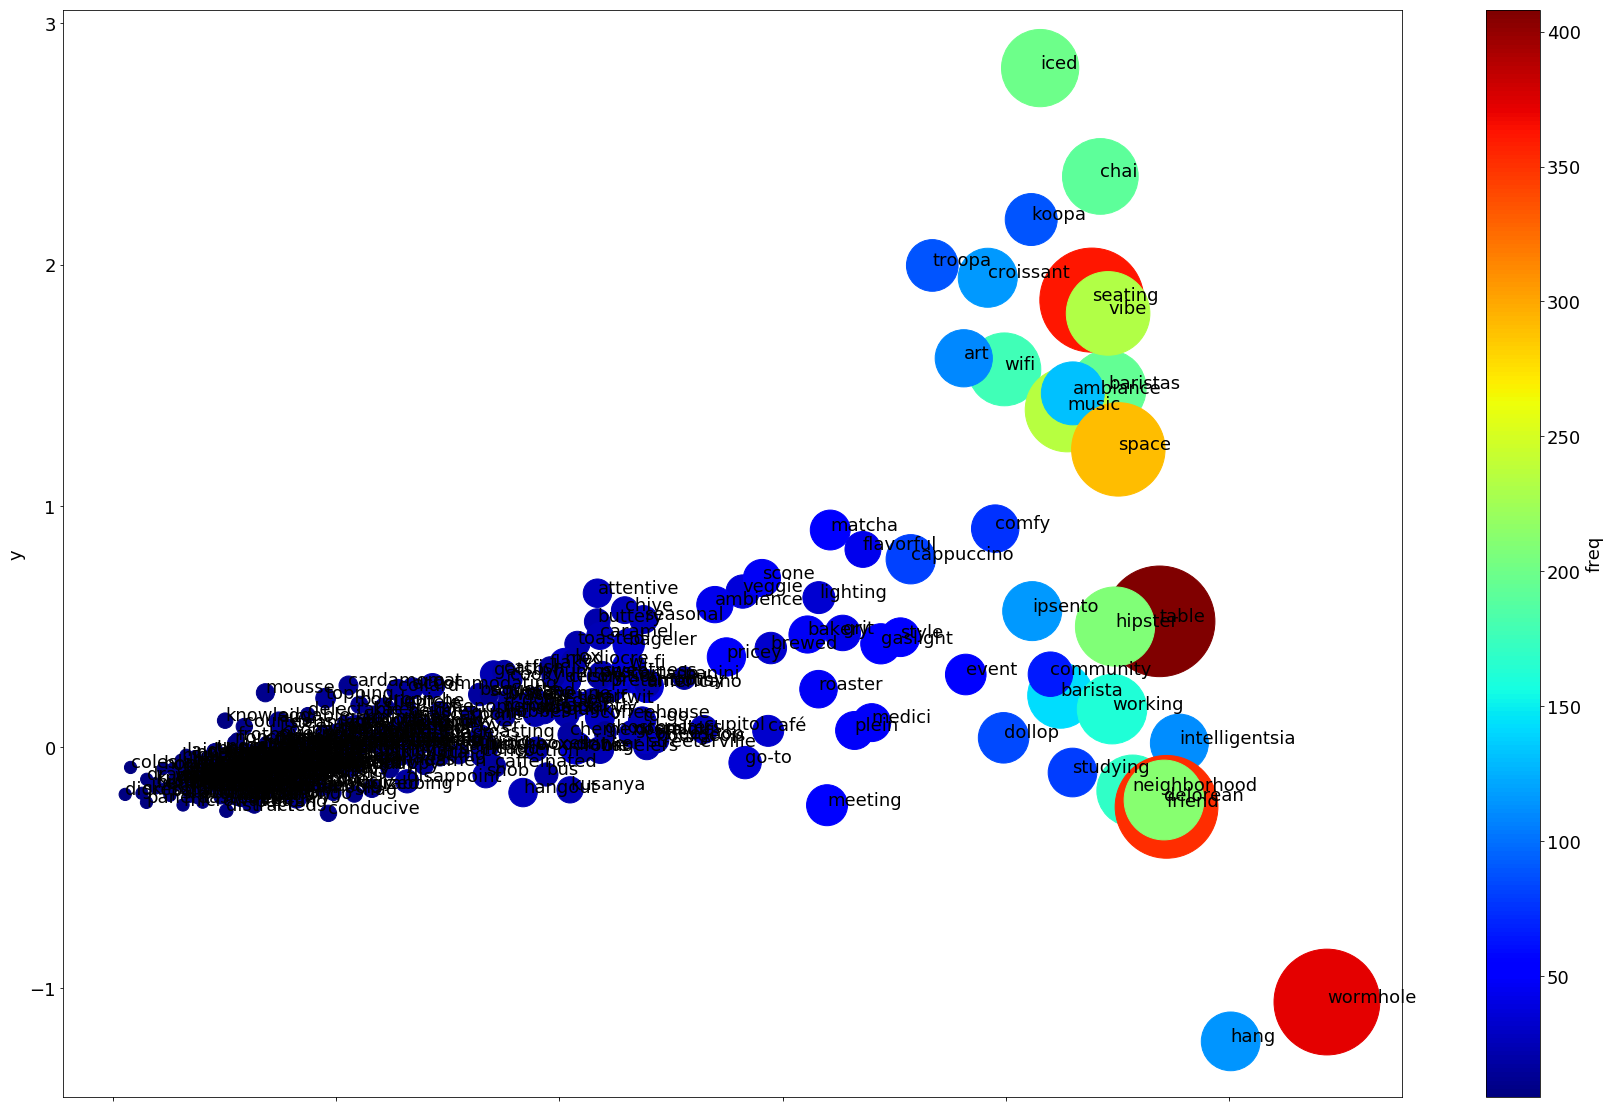

In [14]:
def create_scatter(np_array, words, counter, plot_name):
    """
    Create a scatter plot with words as labels.

    :param np_array: numpy array
    :type  np_array: numpy.ndarray
    :param words: list of words
    :type  words: list
    :param counter: dictionary of frequencies of words
    :type  counter: dict
    :param plot_name: name of the saved plot
    :type  plot_name: str
    """

    matplotlib.rcParams['font.size'] = 18

    df = pd.DataFrame({
        'x': np_array[:, 0],
        'y': np_array[:, 1],
        'freq': np.asarray([counter[word] for word in words])
    })
    freq = np.asarray([counter[word] for word in words])
    df.plot(
        kind='scatter',
        x='x',
        y='y',
        s=df['freq'] * 30,
        c='freq',
        cmap=plt.get_cmap('jet'),
        colorbar=True,
        figsize=(30, 20)
    )

    for i, word in enumerate(words):
        plt.annotate(
            word,
            xy=(np_array[i, 0],
                np_array[i, 1])
        )
    fig = plt.gcf()
    plt.savefig('Gensim_Models/' + plot_name)
    plt.show()


create_scatter(
    filtered_result,
    filtered_words,
    counter,
    'All_Reviews_Word_Embedding_Plot.jpg'
)

# Pipeline For Grouped Reviews

In [15]:
import json
file = open('Processed_Data/Grouped_Reviews')
grouped_data = json.load(file)
file.close()

groups = grouped_data.keys()
groups

dict_keys(['BOHEMIAN', 'NEIGHBORLY', 'CORPORATE'])

In [16]:
def pipeline (grouped_data):
    """
    Combine the process above. Prints out the graphs.
    
    :param grouped_data: a dictionary of groups as the key and reviews as the value
    :type  grouped_data: dict
    :returns: a dictionary of dictionaries. 
              Each key is a group, and each value is another dictionary.
              That dictionary has words as keys and their frequencies as values.
    :rtype:   dict
    """
    
    groups = grouped_data.keys()
    
    frequencies = {}
    for group in groups:
        reviews = grouped_data[group]#[:500]
        cleaned_string = clean_string (reviews)
        (sentences, counter) = to_list_of_sentences (cleaned_string)
        model, words = create_word2vec_model (sentences, group)
        result = dim_reduction (model)
        filtered_result, filtered_words, remaining_freq = filter_words (
            result, 
            words,
            counter,
            csvs_include,
            csvs_exclude,
            'Word_Lists/google.csv',
            save=True,
            out_file_name=group,
            include_words_only=True
        )
        frequencies[group] = remaining_freq
#         filtered_result, filtered_words, remaining_freq = filter_words (
#             pretrained_result, 
#             pretrained_words,
#             counter,
#             csvs_include,
#             csvs_exclude,
#             'Word_Lists/google.csv',
#             save=True,
#             out_file_name=group,
#             include_words_only=True
#         )
        create_scatter(
            filtered_result,
            filtered_words, 
            counter, 
            group + "_Word_Embedding_Plot.jpg"
        )
    return frequencies

Word2Vec(vocab=1963, size=100, alpha=0.025)


/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


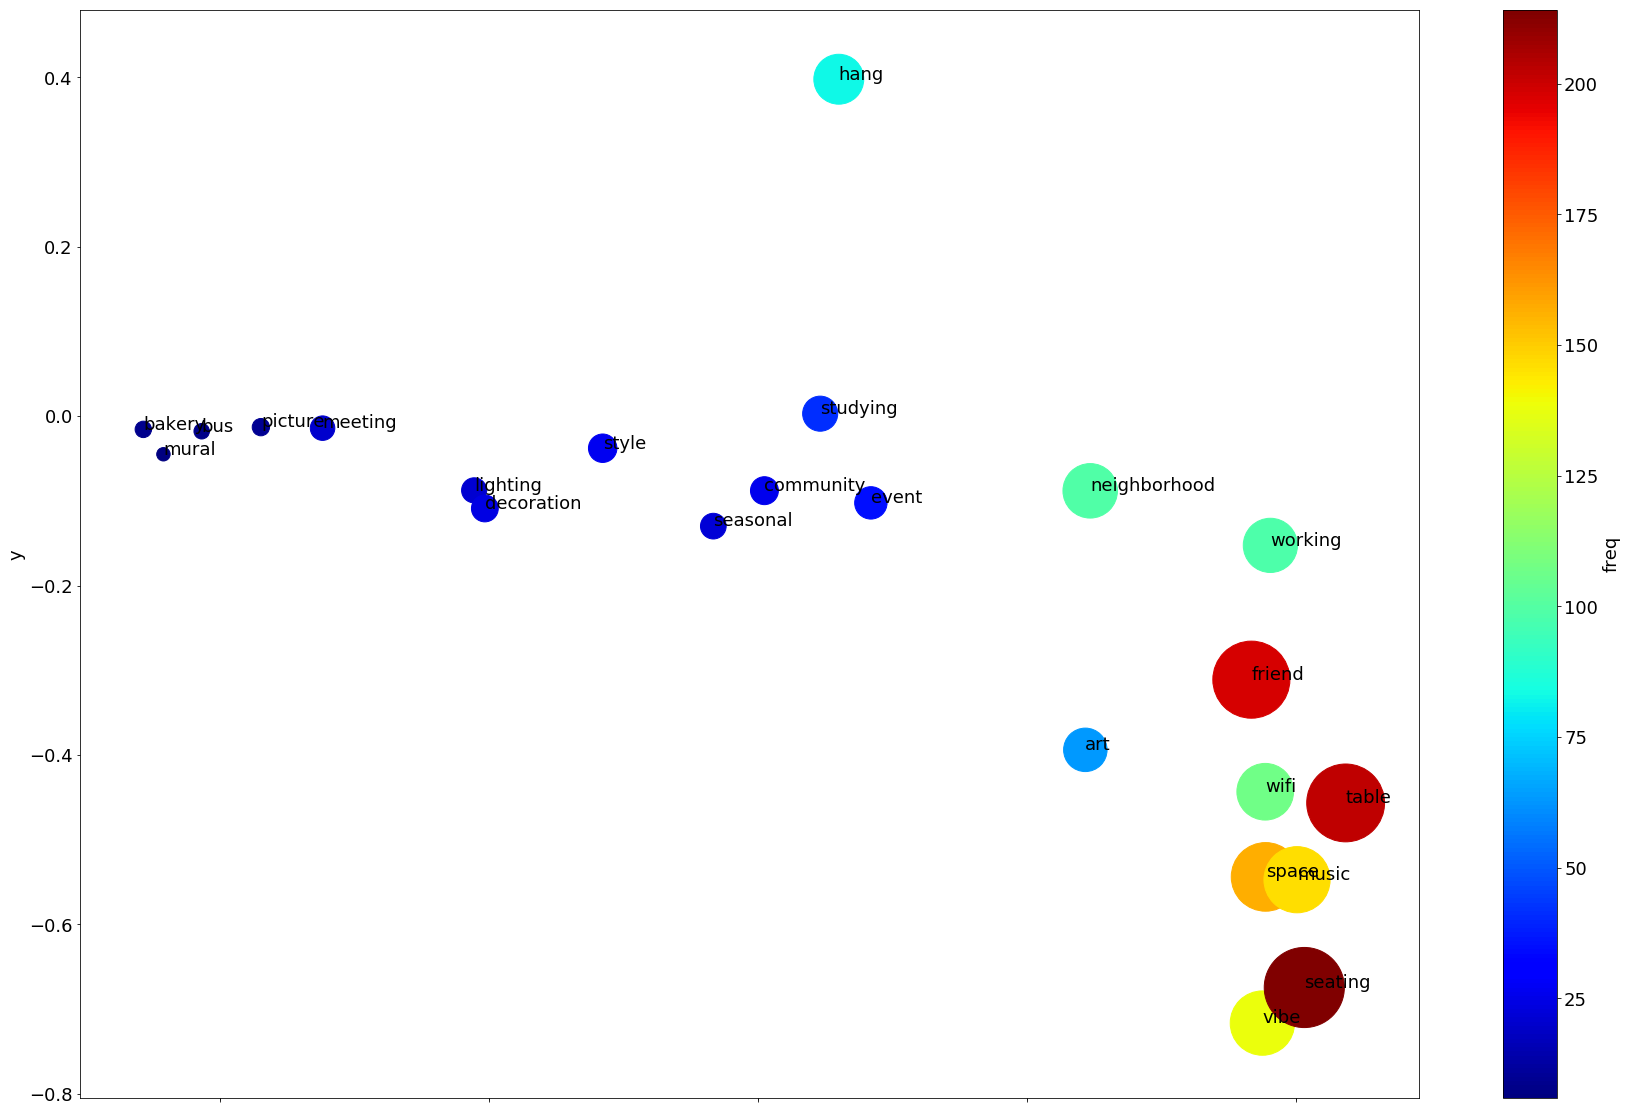

Word2Vec(vocab=1163, size=100, alpha=0.025)


/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


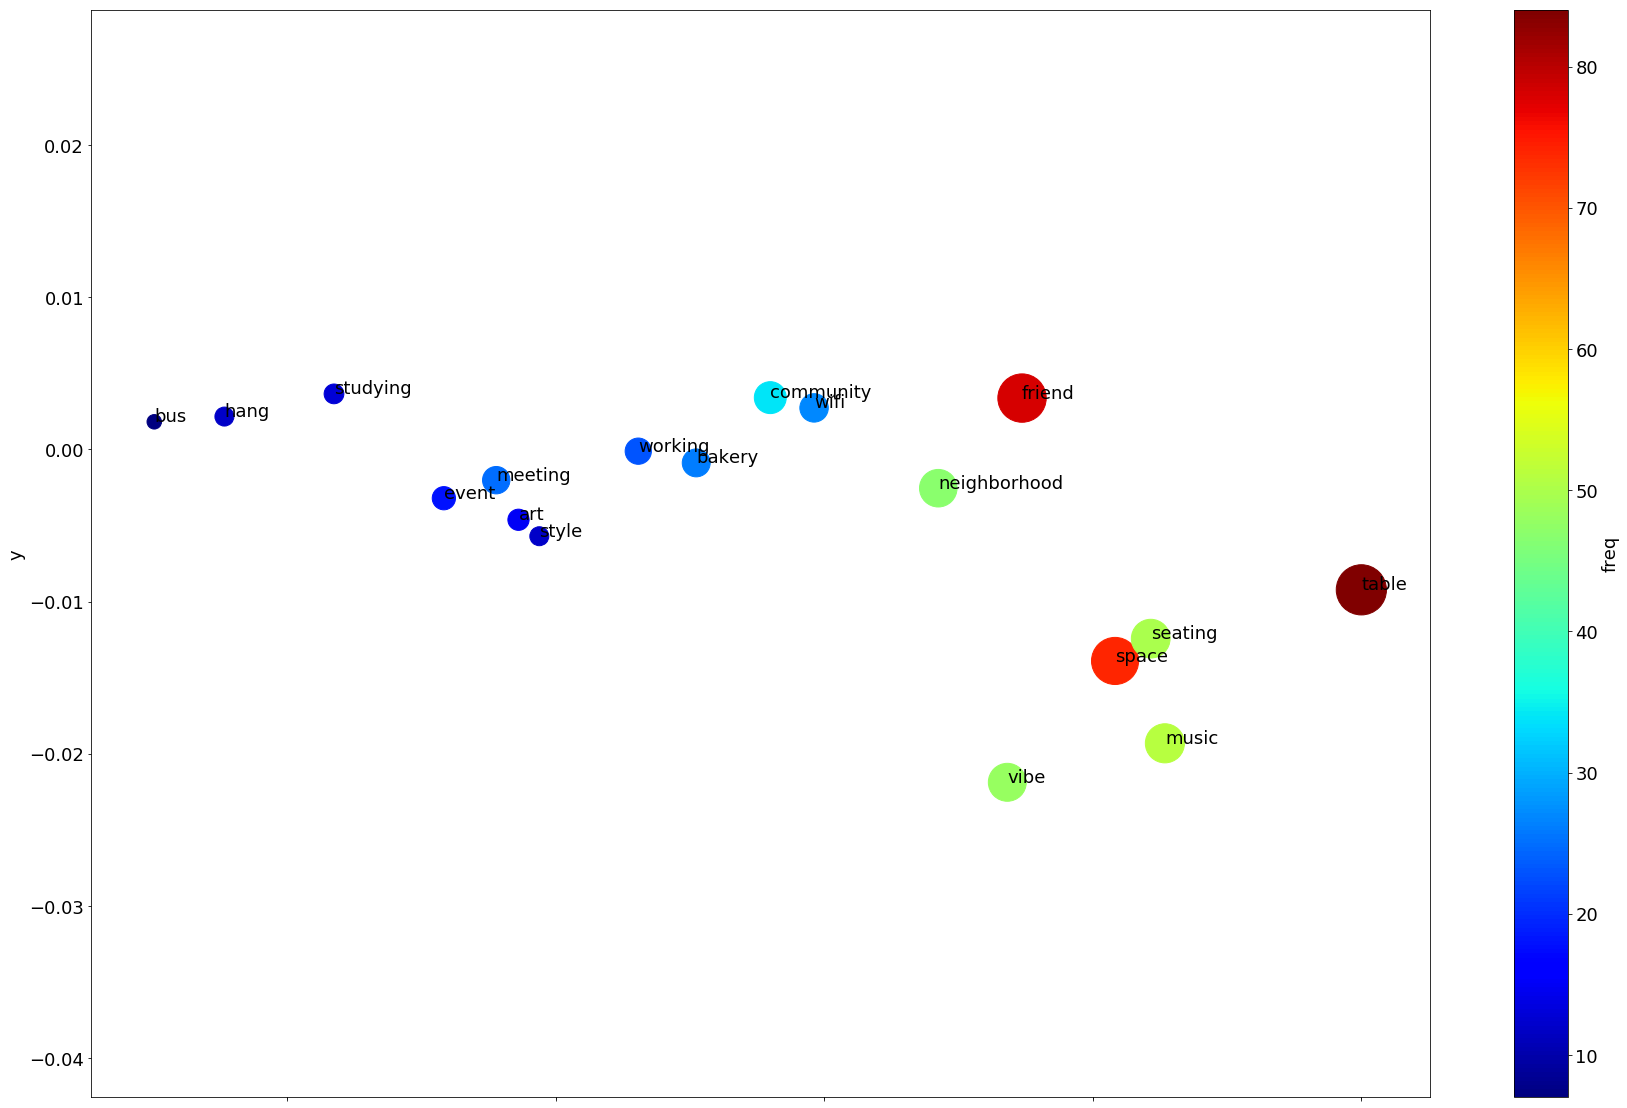

Word2Vec(vocab=1276, size=100, alpha=0.025)


/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


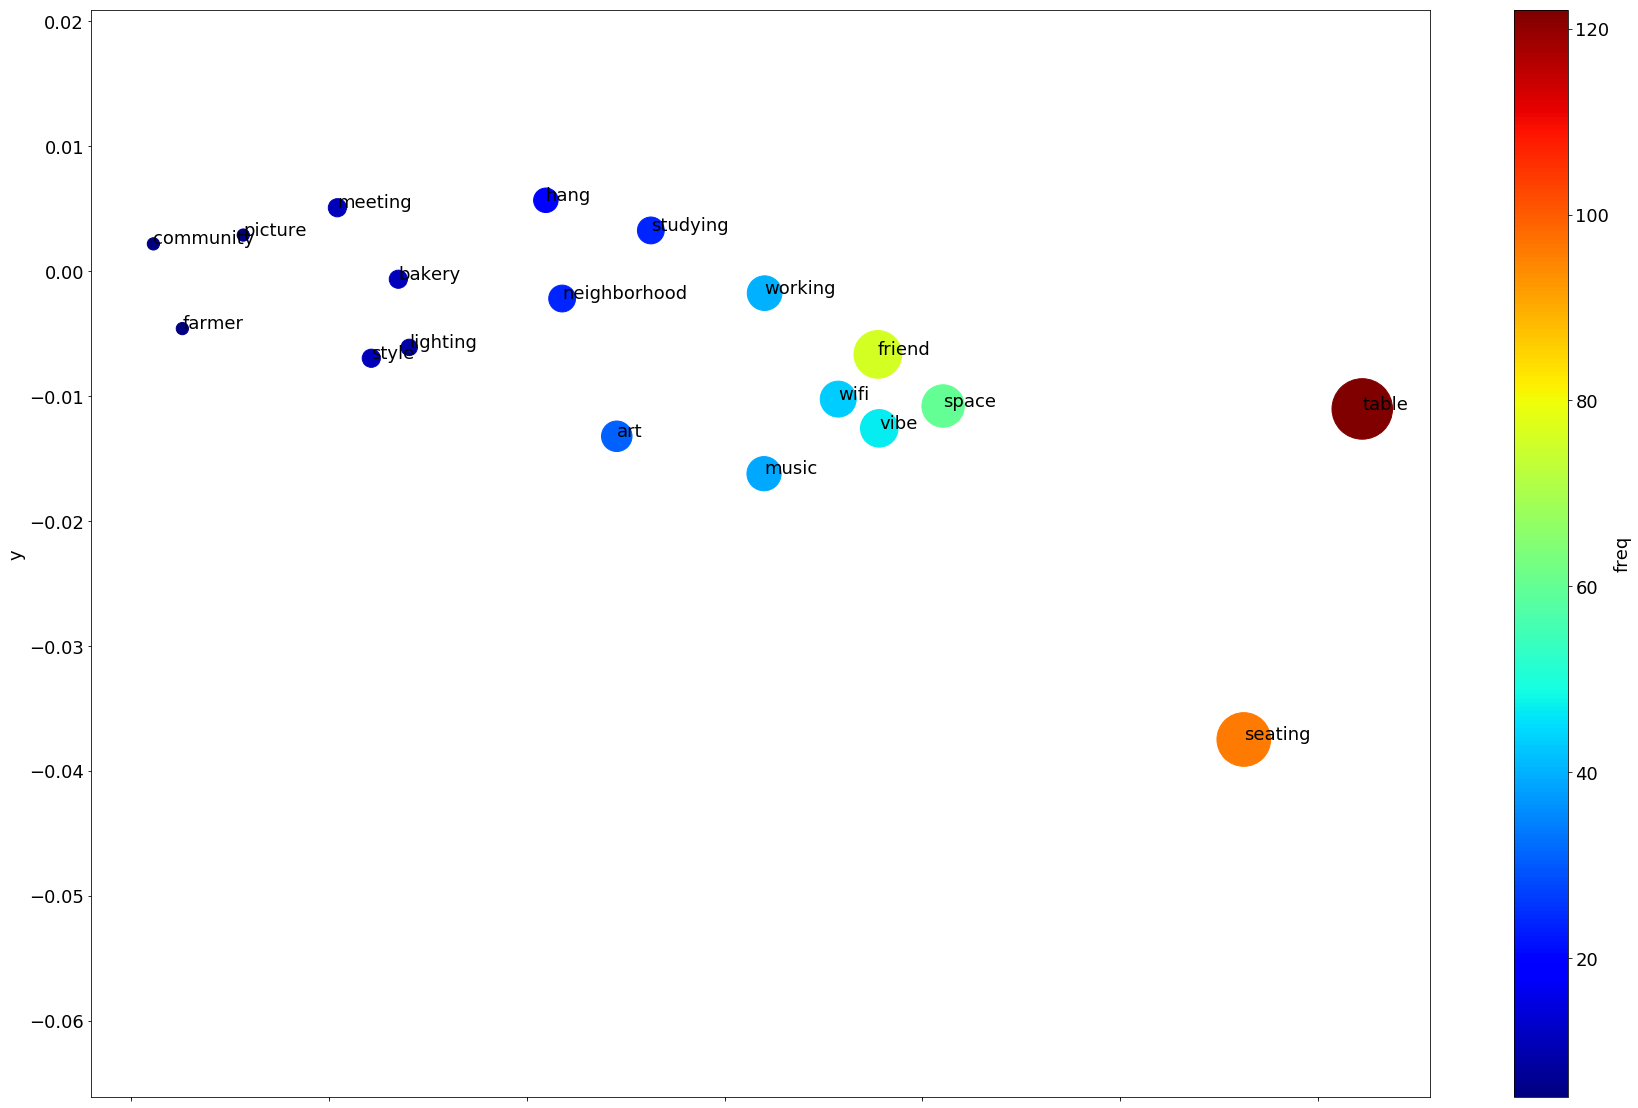

In [17]:
frequencies = pipeline (grouped_data)

In [70]:
#frequencies

# Bar Graph

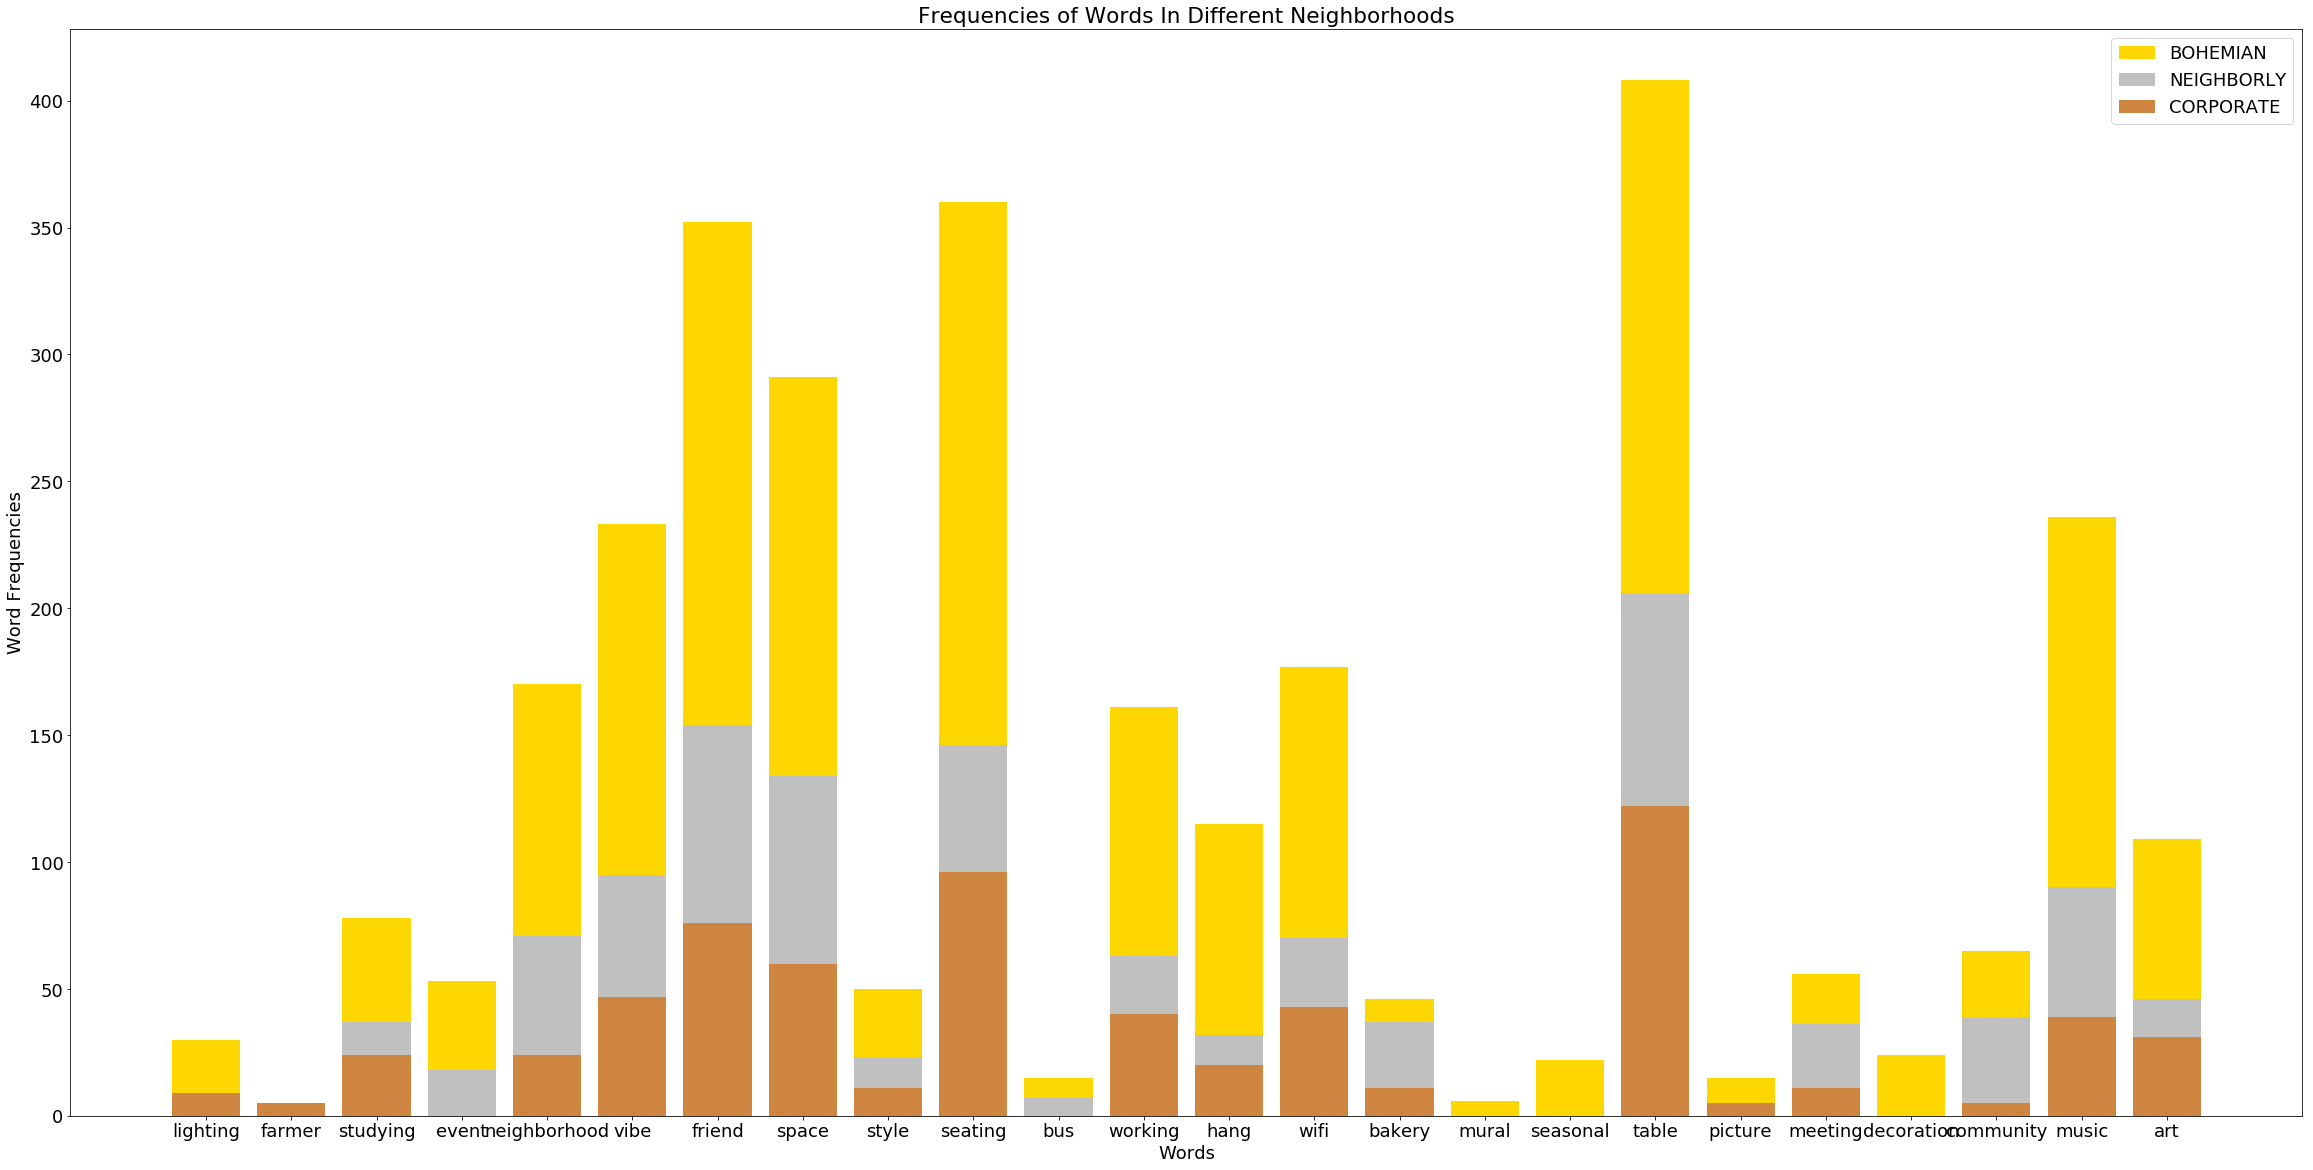

In [123]:
def get_words(frequencies):
    """
    Plot stacked bar graph of frequencies for each group.
    
    :param frequencies: a dictionary of dictionaries. 
                        Each key is a group, and each value is another dictionary.
                        That dictionary has words as keys and their frequencies as values.
    :type frequencies:  dict  
    """
    
    words = set()
    for key, values in frequencies.items():
        words = words.union(values.keys())
    words = list(words)

    bohemian = []
    neighborly = []
    corporate = []
    
    from collections import defaultdict

    groups = ['BOHEMIAN', 'NEIGHBORLY', 'CORPORATE']
    bohemian_freq = defaultdict(lambda: 0, frequencies[groups[0]])
    neighborly_freq = defaultdict(lambda: 0, frequencies[groups[1]])
    corporate_freq = defaultdict(lambda: 0, frequencies[groups[2]])
    
    for word in words: 
        bohemian.append(bohemian_freq[word])
        neighborly.append(neighborly_freq[word])
        corporate.append(corporate_freq[word])
        
    bohemian = np.array(bohemian)
    neighborly = np.array(neighborly)
    corporate = np.array(corporate)
    
    ind = [x for x, _ in enumerate(words)]
    
    plt.figure(figsize=(40,20))
    plt.bar(
        ind, 
        bohemian, 
        width=0.8, 
        label=groups[0], 
        color='gold', 
        bottom=neighborly+corporate
    )
    plt.bar(
        ind, 
        neighborly, 
        width=0.8, 
        label=groups[1], 
        color='silver',
        bottom=corporate
    )
    plt.bar(
        ind, 
        corporate,
        width=0.8,
        label=groups[2], 
        color='#CD853F'
    )

        
    plt.xticks(ind, words)
    plt.ylabel("Word Frequencies")
    plt.xlabel("Words")
    plt.legend(loc="upper right")
    plt.title("Frequencies of Words In Different Neighborhoods")

    plt.savefig('Plots/Word_Frequencies_In_Each_Neighborhood.png')
    plt.show()


get_words(frequencies)

# Create An Instance For Each Word

In [56]:
# x, y coordinate are (+) or (-) depending on category
# bohemian_freq, corporate_freq, neighborly_freq


class Word:
    def __init__(self, word, type_of_word, bohemian_freq, neighborly_freq, corporate_freq):
        """
        :word: str
        :type_of_word: str
        :bohemian_freq: int  
        :neighborly_freq: int 
        :corporate_freq: int
        """

        self.word = word
        self.type_of_word = type_of_word
        self.bohemian_freq = bohemian_freq
        self.neighborly_freq = neighborly_freq
        self.corporate_freq = corporate_freq
        self.x_cor = 0
        self.y_cor = 0


categories = {
    'social': {
        'lighting', 'studying', 'event', 'neighborhood', 'vibe',
        'friend', 'space', 'style', 'seating', 'working',
        'hang', 'wifi', 'bakery', 'table', 'meeting',
        'community', 'quietness', 'outlets', 'children',
        'hang', 'dating'
    },
    'art and culture': {
        'farmer', 'mural', 'seasonal', 'picture', 'decoration',
        'music', 'art', 'signage', 'graffiti', 'festival',
                        'flea',
    },
    'transportation': {
        'bus', 'metra', 'l station', 'subway'
    }
}

In [105]:
def create_word_classes(frequencies):
    """
    Initiate a Word class for each word.

    :param frequencies: a dictionary of dictionaries. 
                        Each key is a group, and each value is another dictionary.
                        That dictionary has words as keys and their frequencies as values.
    :type frequencies:  dict 
    :returns: a list, where each value is a Word class
    :rtype:   list
    """
    
    import random

    words = set()
    for key, values in frequencies.items():
        words = words.union(values.keys())
    words = list(words)

    bohemian = []
    neighborly = []
    corporate = []

    from collections import defaultdict

    groups = ['BOHEMIAN', 'NEIGHBORLY', 'CORPORATE']
    bohemian_freq = defaultdict(lambda: 0, frequencies[groups[0]])
    neighborly_freq = defaultdict(lambda: 0, frequencies[groups[1]])
    corporate_freq = defaultdict(lambda: 0, frequencies[groups[2]])

    for word in words:
        bohemian.append(bohemian_freq[word])
        neighborly.append(neighborly_freq[word])
        corporate.append(corporate_freq[word])

    types_of_words = []
    for word in words:
        for category, sets in categories.items():
            if word in sets:
                #print (word)
                types_of_words.append(category)

    classes = [Word(word, types_of_words[i], bohemian[i], neighborly[i],
                    corporate[i]) for (i, word) in enumerate(words)]

    # create x, y coordinates for scatter plotting
    for word_class in classes:
        if word_class.type_of_word == 'social':
            # first quadrant
            word_class.x_cor = random.uniform(.1, 1)
            word_class.y_cor = random.uniform(.1, 1)
        elif word_class.type_of_word == 'art and culture':
            # second quadrant
            word_class.x_cor = -1 * random.uniform(.1, 1)
            word_class.y_cor = random.uniform(.1, 1)
        elif word_class.type_of_word == 'transportation':
            # third quadrant
            word_class.x_cor = -1 * random.uniform(.1, 1)
            word_class.y_cor = -1 * random.uniform(.1, 1)
        else:
            raise Exception('The word does not have a category')
    return classes


classes_of_words = create_word_classes(frequencies)
type (classes_of_words)

list

# Plot Bar Graph For Categories of Words

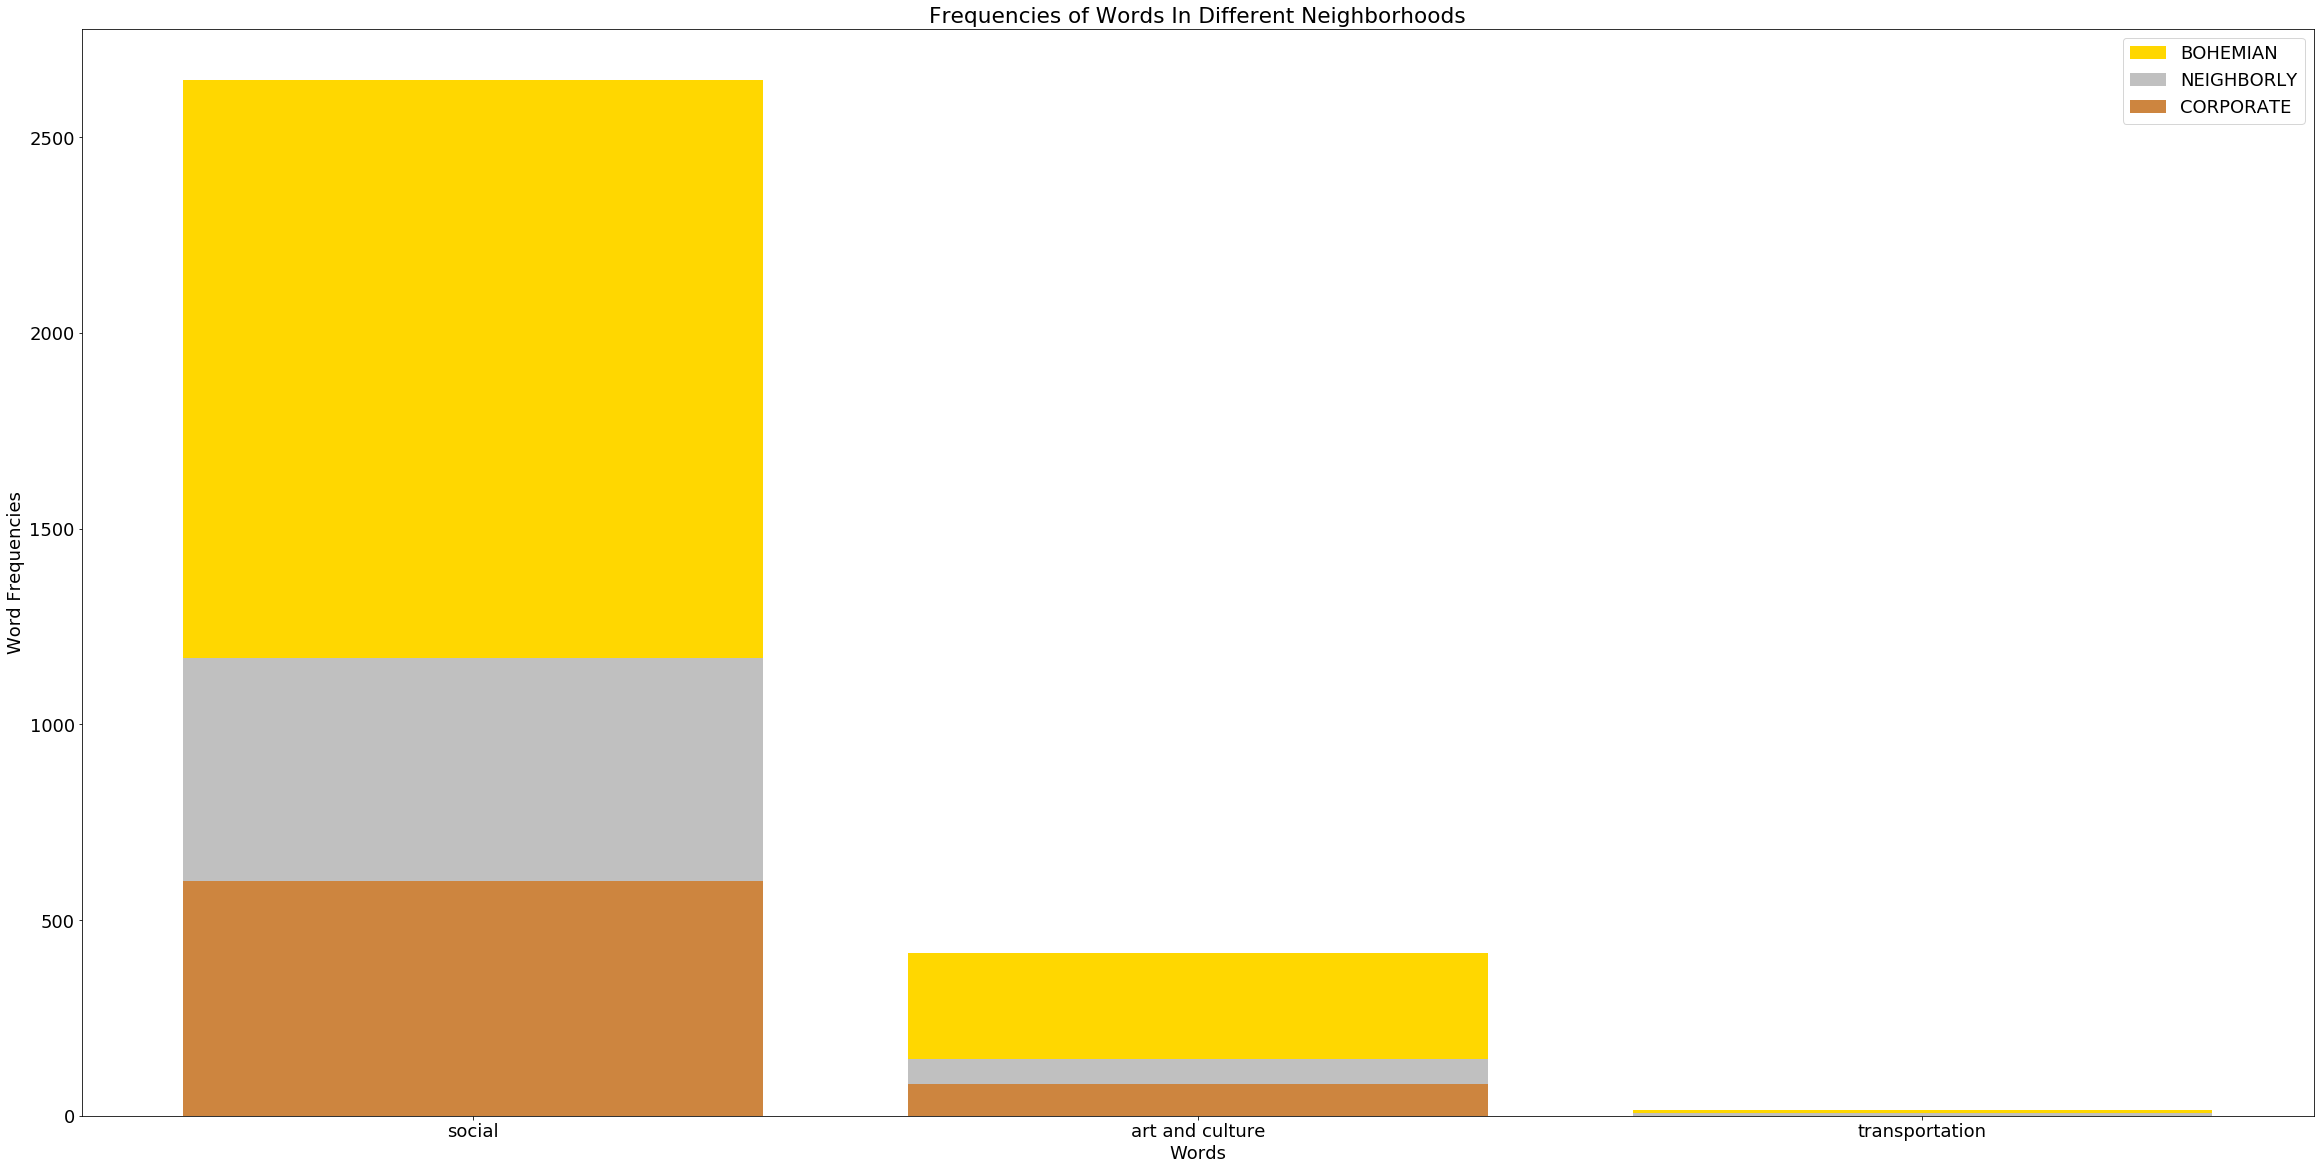

In [122]:
def get_cat_words(word_classes):
    """
    Plot stacked bar graph of frequencies for each category of words.
    
    :param word_classes: a list, where each value is a Word class
    :type  word_classes: list
    """
    
    from collections import defaultdict
    
    category_of_words = list (set([word_class.type_of_word for word_class in word_classes]))
        
    groups = ['BOHEMIAN', 'NEIGHBORLY', 'CORPORATE'] 
    bohemian = defaultdict(lambda: 0)
    neighborly = defaultdict(lambda: 0)
    corporate = defaultdict(lambda: 0)
    
    for word_class in word_classes:
        category = word_class.type_of_word
        neighborly[category] = neighborly[category] + word_class.neighborly_freq 
        bohemian[category] = bohemian[category] + word_class.bohemian_freq 
        corporate[category] = corporate[category] + word_class.corporate_freq 
        
    bohemian = [bohemian[category] for category in category_of_words]
    neighborly = [neighborly[category] for category in category_of_words]
    corporate = [corporate[category] for category in category_of_words]
    
    bohemian = np.array(bohemian)
    neighborly = np.array(neighborly)
    corporate = np.array(corporate)

    ind = [x for x, _ in enumerate(category_of_words)]
    
    plt.figure(figsize=(40,20))
    plt.bar(
        ind, 
        bohemian, 
        width=0.8, 
        label=groups[0], 
        color='gold', 
        bottom=neighborly+corporate
    )
    plt.bar(
        ind, 
        neighborly, 
        width=0.8, 
        label=groups[1], 
        color='silver',
        bottom=corporate
    )
    plt.bar(
        ind, 
        corporate,
        width=0.8,
        label=groups[2], 
        color='#CD853F'
    )
     
    plt.xticks(ind, category_of_words)
    plt.ylabel("Word Frequencies")
    plt.xlabel("Words")
    plt.legend(loc="upper right")
    plt.title("Frequencies of Words In Different Neighborhoods")

    plt.savefig('Plots/Word_Freq_of_Groups_of_Words.png')
    plt.show()

get_cat_words(classes_of_words)

# Plot ScatterGraph With Fixed Coordinates

In [113]:
def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    """
    Draw a mini pie chart to be placed in a scattterplot.
    
    :param ax: axis of the graph
    :type  ax: matplotlib.axes._subplots.AxesSubplot
    :param ratios: list, where the ratios indicate the proportions of each category
    :type  ratios: list
    :param X: x coordinate to be plotted
    :type  X: float
    :param Y: y coordinate to be plotted
    :type  Y: float
    :param size: size of scatterplot
    :type  size: float
    """
    
    colors = ['red','blue','green','yellow','magenta','purple']
    
    N = len(ratios)
 
    xy = []
 
    start = 0.
    for ratio in ratios:
        x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
        #xy1 = zip(x,y)
        xy1 = np.column_stack([x, y])
        xy.append(xy1)
        start += ratio
 
    for i, xyi in enumerate(xy):
        ax.scatter([X],[Y] , marker=(xyi,0), s=size, facecolor=colors[i] )

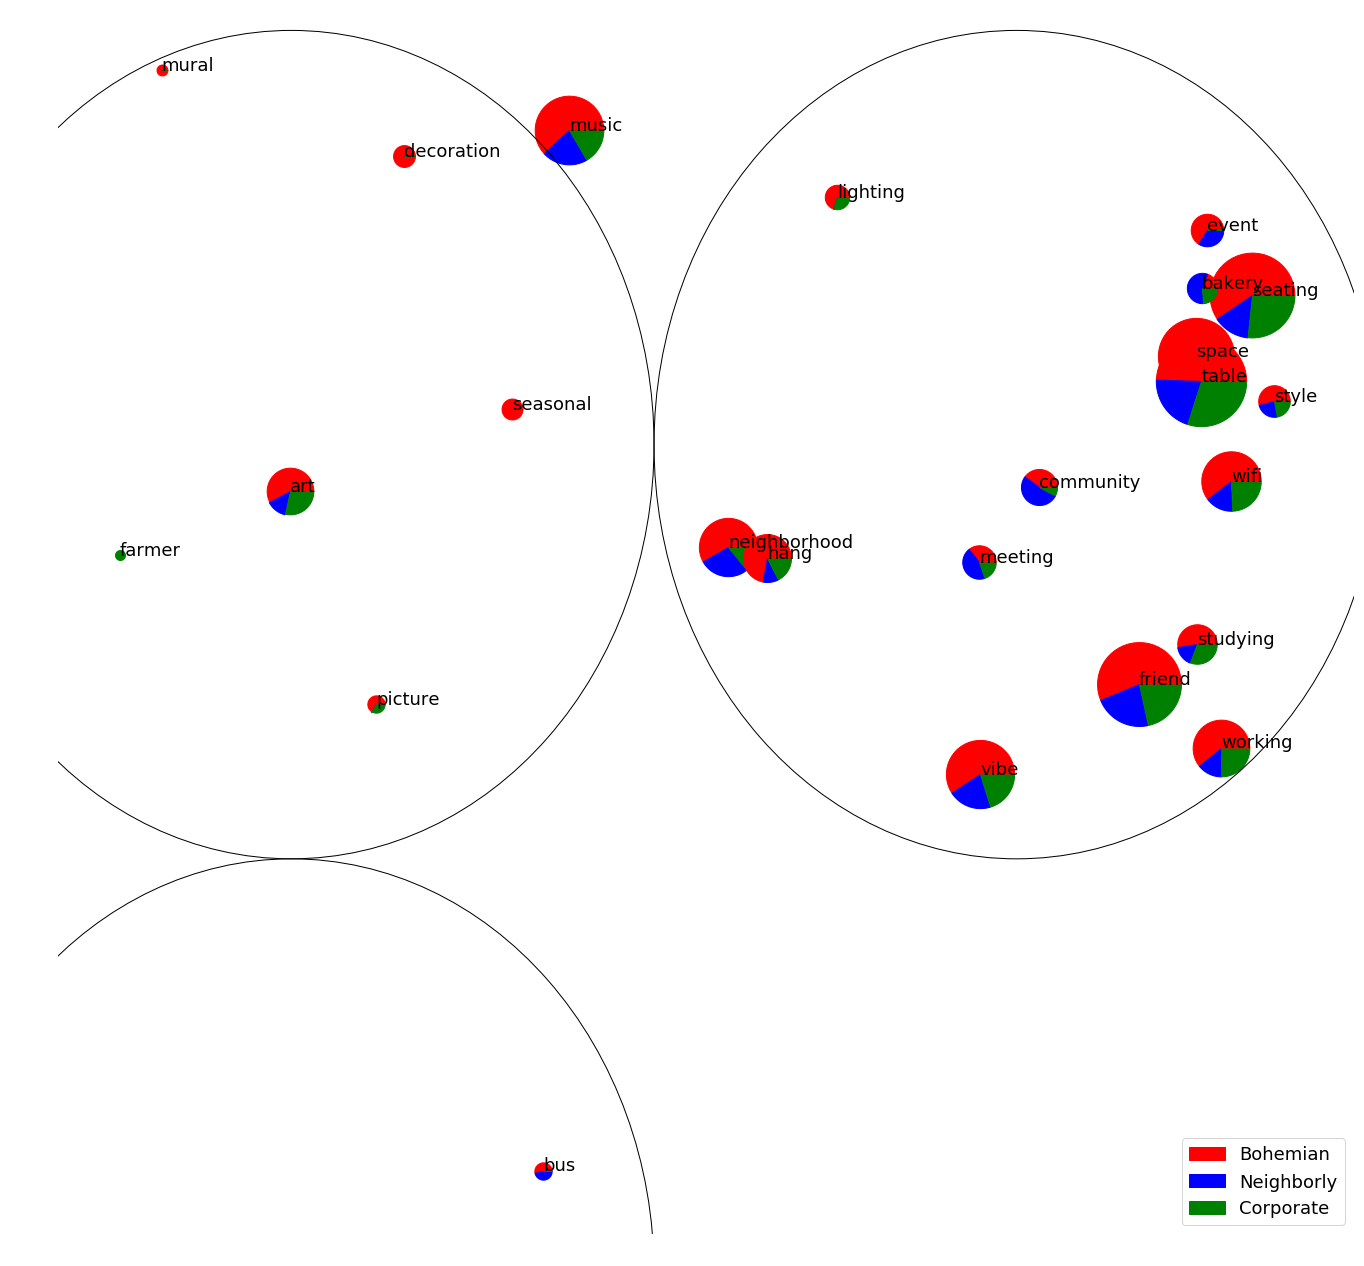

In [115]:
import matplotlib.patches as mpatches

def create_fixed_scatter(classes_of_words):
    """
    Create a scatter plot with words as labels, and each point is a pie chart.

    :param classes_of_words: a list, where each value is a Word class
    :type  classes_of_words: list
    """

    matplotlib.rcParams['font.size'] = 18

    fig = plt.figure(figsize=(20, 20))
    plt.subplots_adjust(left=0.05, right=0.95, top=0.90,
                        bottom=0.05, wspace=0.15, hspace=0.05)
    ax = plt.subplot(111)

    red_patch = mpatches.Patch(color='red', label='Bohemian')
    blue_patch = mpatches.Patch(color='blue', label='Neighborly')
    green_patch = mpatches.Patch(color='green', label='Corporate')
    plt.legend(handles=[red_patch, blue_patch, green_patch])
    
    for word_class in classes_of_words:
        # red
        bo = word_class.bohemian_freq
        # blue
        ne = word_class.neighborly_freq
        # green
        co = word_class.corporate_freq
        total = bo + ne + co

        x = word_class.x_cor
        y = word_class.y_cor
        draw_pie(ax, [bo / total, ne / total, co / total],
                 x, y, size=total*20)
        
        plt.annotate(
            word_class.word,
            xy=(x,y))
    
    # drawing circles for groups of words
    circle_social = plt.Circle((.5, .5), radius=0.50, fc='y', fill=None)
    circle_culture = plt.Circle((-.5, .5), radius=0.50, fc='y', fill=None)
    circle_transportation = plt.Circle((-.5, -.5), radius=0.50, fc='y', fill=None)
    plt.gca().add_patch(circle_social)
    plt.gca().add_patch(circle_culture)
    plt.gca().add_patch(circle_transportation)
    
    plt.axis('off')
    plt.savefig('Plots/' + 'Classes_of_Words.png')
    plt.show()


create_fixed_scatter(classes_of_words)

# Word Clouds

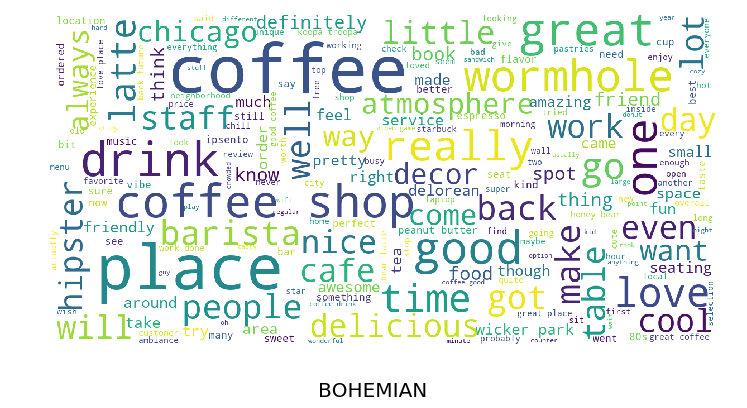

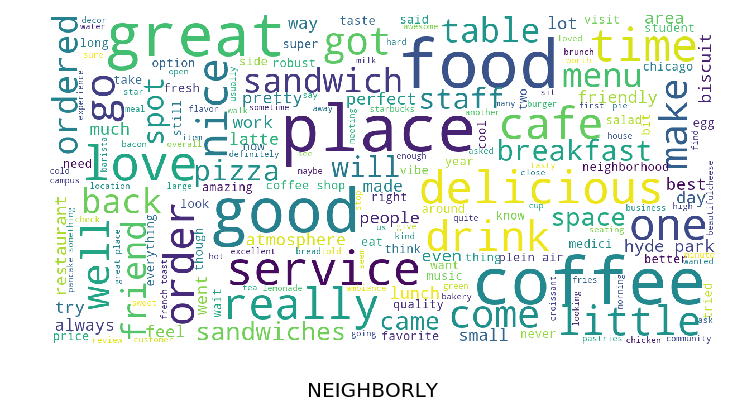

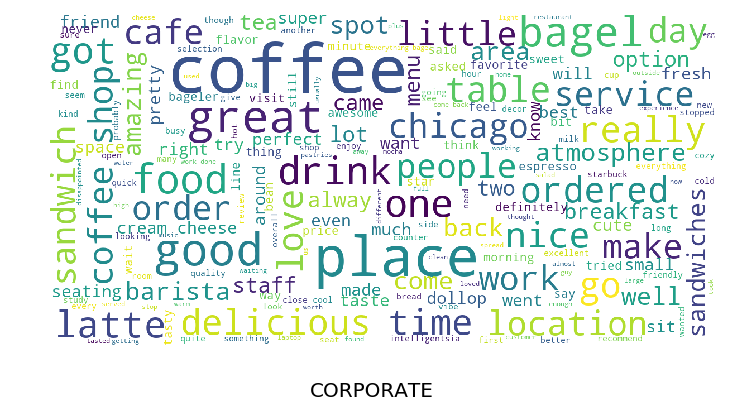

In [124]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title):
    """
    Create a word cloud for a string
    
    :param data: a string to parse for the word cloud
    :type  data: str
    :param title: Title of the word cloud
    :type  title: str
    """
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.savefig('Plots/Word_Cloud_' + title)
    plt.imshow(wordcloud)
    plt.show()
 
for key in groups:
    show_wordcloud(grouped_data[key], key)